## Quadratic minimization
$\newcommand{\n}[1]{\left\|#1 \right\|}$ 
$\newcommand{\R}{\mathbb R}            $ 
$\newcommand{\lr}[1]{\langle #1\rangle}$

We want to minimize
$$\min_x f(x):=\frac 1 2 \lr{Ax,x}$$
for $A\in \R^{n\times n}$. The gradient is $\nabla f(x) = Ax$.


This is a simple academic examples, where basically any method we test can be better depending on the accuracy we want to get.

We run experiments for three scenarios: 

1) $A = B^\top B$
with a Gaussian matrix $B = \R^{m\times n}$ and $m=\frac n2$;

2) $A = B^{-1}$, where
$B_{ij} = 0.99^{|i-j|}$;

3) $A = H^\top H$ with the Hilbert matrix
$H\in\R^{n\times n}$: $H_{ij} = \frac{1}{i+j-1}$. 

In all experiments we used $n=100$ and random initialization.


In [45]:
import numpy as np
import scipy.linalg as LA
import seaborn as sns
from matplotlib import pyplot as plt
from algorithms import *

%load_ext autoreload
%autoreload 2

# fix random generator
np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Choose any of the examples below

In [88]:
# Example 1. Gaussian matrix
n = 100
m = 50
B = np.random.randn(m, n)
A = B.T @ B

In [51]:
# Example 2. Inverse of the kernel matrix 
gamma = 0.99
n = 100
B = LA.toeplitz(np.arange(n))
A = LA.inv(gamma**B)


In [46]:
# Example 3. Hilbert matrix. Famous to be very ill-condtioned.
n = 100
B = LA.hilbert(n)
A = B.T @ B

Define all the ingredients

In [89]:
# Compute the norm 
L = LA.norm(A, 2)

# Initialization
np.random.seed(0)
x0 = np.random.randn(n)

# Define function
f = lambda x: 1/2 * Ax @ x

# its gradient
df = lambda x: A @ x

# evaluation function
J = lambda x: LA.norm(x)

Run the algorithms. It might take some time, if the dataset and/or the number of iterations are huge

In [90]:
# number of iteration
N = 1000

ans1 = gd(J, df, x0, 1./L, numb_iter=N)
ans2 = accel_gd(J, df, x0, 1./L, numb_iter=N)
ans3 = ad_grad(J, df, x0, 1e-9, numb_iter=N)
ans4 = ad_grad_smooth(J, df, x0, L, numb_iter=N)
ans5 = ad_grad_accel(J, df, x0, 1e-9, numb_iter=N)

Time execution for GD: 0.023290294999242178
Time execution for GD: 0.02602286900037143
Time execution of adaptive gradient descent: 0.04935454800033767
Time execution of adaptive gradient descent (L is known): 0.05205853900042712
Time execution of adaptive gradient descent: 0.05611296000006405


Make the plots.

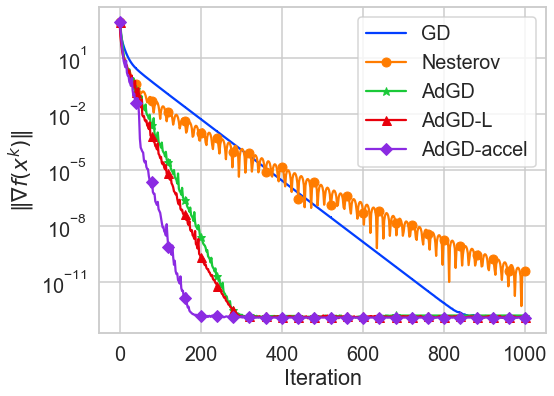

In [91]:
sns.set(style="whitegrid", context="talk", font_scale=1.2, palette=sns.color_palette("bright"), color_codes=False)

answers = [ans1, ans2, ans3, ans4, ans5]
values = [ans[0] for ans in answers]
labels = ["GD", "Nesterov", "AdGD", "AdGD-L", "AdGD-accel"]
markers = [',', 'o', '*', '^', 'D']


n_plot = 400
plt.figure(figsize=(8,6))
for i, val in enumerate(values):
    skip = len(val) // n_plot
    plt.plot(
        np.arange(0, len(val), skip), 
        val[::skip], label=labels[i],
        marker=markers[i], markevery=20)
    
plt.yscale('log')
plt.xlabel(u'Iteration')
plt.ylabel(r'$\Vert \nabla f(x^k)\Vert$')
plt.legend()
#plt.savefig('../plots/for_paper/quadratic_gauss.pdf', bbox_inches='tight', dpi=300)
#plt.savefig('../plots/for_paper/quadratic_gamma=099.pdf', bbox_inches='tight', dpi=300)
#plt.savefig('../plots/for_paper/quadratic_hilbert2.pdf', bbox_inches='tight', dpi=300)

#plt.show()
